# Live Code 1 - Phase 1
Muhammad Ikhsan Rahman Hakim - FTDS001

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import svm

%matplotlib inline

# Data Loading

In [2]:
df_asurance = pd.read_csv('insurance.csv')
df_galaxy = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/GalaxyMorphology.csv')

Galaxy dataframe

In [3]:
df_galaxy.head()

,Unnamed: 0,TType,K,C,A,S,G2,H,CNN2classes1stClass
0,0,1.854829,6.560199,0.357051,0.932151,0.850992,1.588183,0.697214,1
1,1,4.815538,25.950829,0.313292,0.610999,0.723122,1.533653,0.719412,1
2,2,0.678056,6.867416,0.408286,0.881524,0.813231,1.743747,0.750872,1
3,3,-0.547708,11.877941,-9999.999999,0.838779,0.816965,1.672529,0.771995,1
4,4,2.028543,20.458965,0.446453,0.839216,0.801140,1.107665,0.610453,1


In [4]:
df_galaxy['CNN2classes1stClass'].unique()

array([1, 0], dtype=int64)

Asurance dataframe

In [5]:
df_asurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
print(df_asurance['children'].unique(), df_asurance['sex'].unique(), df_asurance['smoker'].unique())

[0 1 3 2 5 4] ['female' 'male'] ['yes' 'no']


In [7]:
print('Dimension of Df Galaxy: ',df_galaxy.shape)
print('Dimension of Df Asurance: ',df_asurance.shape)

Dimension of Df Galaxy:  (20000, 9)
Dimension of Df Asurance:  (1338, 7)


In [8]:
df_asurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df_galaxy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           20000 non-null  int64  
 1   TType                20000 non-null  float64
 2   K                    20000 non-null  float64
 3   C                    20000 non-null  float64
 4   A                    20000 non-null  float64
 5   S                    20000 non-null  float64
 6   G2                   20000 non-null  float64
 7   H                    20000 non-null  float64
 8   CNN2classes1stClass  20000 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 1.4 MB


# Data Cleaning

In [10]:
df_galaxy.isnull().sum()

Unnamed: 0             0
TType                  0
K                      0
C                      0
A                      0
S                      0
G2                     0
H                      0
CNN2classes1stClass    0
dtype: int64

In [11]:
df_asurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

It seeems all data is good enough.

# EDA

### Galaxy

In [12]:
df_galaxy.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20000.0,9999.500000,5773.647028,0.000000,4999.750000,9999.500000,14999.250000,19999.000000
TType,20000.0,0.395287,2.432726,-2.913205,-1.952929,-0.071197,2.376115,7.773612
K,20000.0,18.708788,26.185899,1.471492,7.039827,11.781205,20.920884,1035.467764
C,20000.0,-1846.175115,3880.385347,-9999.999999,0.292831,0.365902,0.437227,0.761184
A,20000.0,0.323992,70.716614,-9999.999999,0.782718,0.859172,0.905404,0.986535
S,20000.0,-3.220560,199.980672,-9999.999999,0.757618,0.844121,0.889421,0.979032
G2,20000.0,0.747130,70.720857,-9999.999999,0.979765,1.364905,1.606039,1.953389
H,20000.0,0.655137,0.113237,0.017008,0.585356,0.659603,0.743029,0.929947
CNN2classes1stClass,20000.0,0.807200,0.394507,0.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# check data correlation with CNN2classess1stClass column
feature_cols = ['C','A','S','G2','H']
df_galaxy[feature_cols+['CNN2classes1stClass']].corr()

,C,A,S,G2,H,CNN2classes1stClass
C,1.000000,-3.478015e-03,2.907724e-02,-0.003442,0.035715,0.124774
A,-0.003478,1.000000e+00,-6.096500e-07,-0.000007,0.016342,-0.003966
S,0.029077,-6.096500e-07,1.000000e+00,0.000053,0.006020,-0.009731
G2,-0.003442,-7.235741e-06,5.329439e-05,1.000000,0.016234,-0.001824
H,0.035715,1.634182e-02,6.020359e-03,0.016234,1.000000,0.266917
CNN2classes1stClass,0.124774,-3.965615e-03,-9.730514e-03,-0.001824,0.266917,1.000000


<AxesSubplot:>

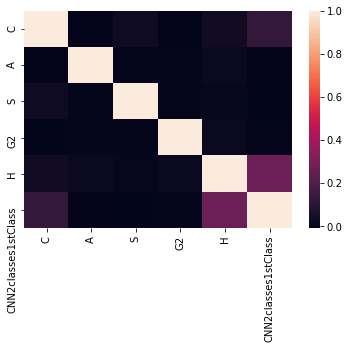

In [14]:
sns.heatmap(df_galaxy[feature_cols+['CNN2classes1stClass']].corr())

### Asurance

In [15]:
df_asurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [16]:
smoker_dmy = pd.get_dummies(df_asurance['smoker'], prefix="smoker_dmy")

In [17]:
df_asurance = pd.concat([df_asurance,smoker_dmy],axis=1)
df_asurance.head()

,age,sex,bmi,children,smoker,region,charges,smoker_dmy_no,smoker_dmy_yes
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0


In [18]:
as_feature_cols = ['age','bmi','children','smoker_dmy_yes']
df_asurance[as_feature_cols+['charges']].corr()

,age,bmi,children,smoker_dmy_yes,charges
age,1.000000,0.109272,0.042469,-0.025019,0.299008
bmi,0.109272,1.000000,0.012759,0.003750,0.198341
children,0.042469,0.012759,1.000000,0.007673,0.067998
smoker_dmy_yes,-0.025019,0.003750,0.007673,1.000000,0.787251
charges,0.299008,0.198341,0.067998,0.787251,1.000000


# Data Transformation

# Galaxy

In [19]:
gal_feature_cols = ['C','A','S','G2','H']
X = df_galaxy[feature_cols]
y = df_galaxy['CNN2classes1stClass']

### Split data

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=69, stratify=y)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=69, stratify=y_train)

### Modelling

Scale data

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_trf = scaler.transform(X_train)

## Create model and train (Galaxy with SVM)

In [23]:
from sklearn.svm import SVC

#svc with kernel linear
model_svc_linear = SVC(kernel='linear', random_state=69,C=1)
%time model_svc_linear.fit(X_train_trf, y_train)

Wall time: 5.55 s


SVC(C=1, kernel='linear', random_state=69)

## Model Analysis

Performance evaluation

In [24]:
X_val_trf = scaler.transform(X_val)

In [25]:
from sklearn.metrics import classification_report

%time y_val_predict = model_svc_linear.predict(X_val_trf)
print(classification_report(y_val, y_val_predict))

Wall time: 621 ms
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       771
           1       0.81      1.00      0.89      3229

    accuracy                           0.81      4000
   macro avg       0.40      0.50      0.45      4000
weighted avg       0.65      0.81      0.72      4000



C:\Users\mistersunday\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mistersunday\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\mistersunday\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Confusion matrix**

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

y_val_pred = model_svc_linear.predict(X_val_trf)
cm = confusion_matrix(y_val, y_val_pred)

print(cm)
print(precision_score(y_val, y_val_pred))
print(recall_score(y_val, y_val_pred))

[[   0  771]
 [   0 3229]]
0.80725
1.0


**ROC curve**

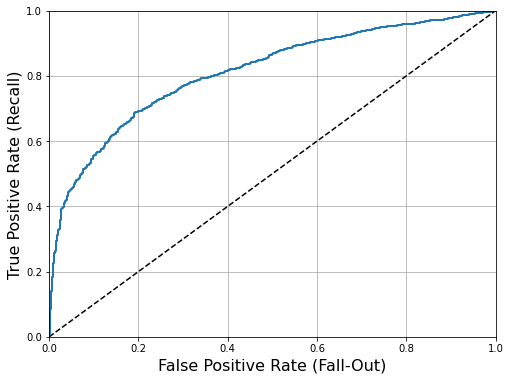

In [27]:
from sklearn.metrics import roc_curve,auc

plt.figure(figsize=(8, 6))                                   
plt.axis([0, 1, 0, 1])                                    
plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
plt.ylabel('True Positive Rate (Recall)', fontsize=16)   
plt.grid(True)                                            
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal

y_scores = model_svc_linear.decision_function(X_val_trf)
fpr, tpr, thresholds = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2)

# Conclusion

Dari hasil confusion matrix dan ROC, dapat disimpulkan bahwa model ini cukup efektif digunakan dengan dataset yang ada. Karena menghasilkan True positiver rate yang cukup tinggi.

# Assurance

### Data transform
Select features

In [28]:
as_feature_cols = ['age','bmi','children','smoker_dmy_yes','smoker_dmy_no']
X = df_asurance[as_feature_cols]
y = df_asurance['charges']

<AxesSubplot:xlabel='age', ylabel='charges'>

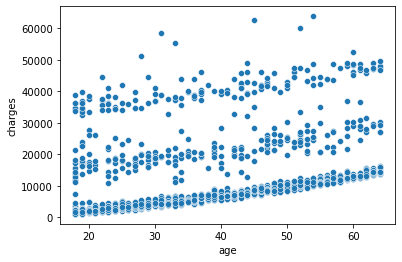

In [29]:
sns.scatterplot(data=df_asurance,x='age',y='charges')

Terlihat bahwa umur berkorelasi dengan biaya.

In [30]:
#Checking Multicorrelation
print(np.abs((X.corr())>0.7).agg('sum').sum()-len(X.columns))
df_asurance.corr()

0


,age,bmi,children,charges,smoker_dmy_no,smoker_dmy_yes
age,1.000000,0.109272,0.042469,0.299008,0.025019,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.003750,0.003750
children,0.042469,0.012759,1.000000,0.067998,-0.007673,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.787251,0.787251
smoker_dmy_no,0.025019,-0.003750,-0.007673,-0.787251,1.000000,-1.000000
smoker_dmy_yes,-0.025019,0.003750,0.007673,0.787251,-1.000000,1.000000


### Splitting data

In [31]:
from sklearn.model_selection import train_test_split

X_train = X[:int(len(df_asurance)*0.8)]
X_val = X[int(len(df_asurance)*0.8):]
y_train = y[:int(len(df_asurance)*0.8)]
y_val = y[int(len(df_asurance)*0.8):]
print(X_train.shape)
print(X_val.shape)

(1070, 5)
(268, 5)


### Scaling Data

In [32]:
def z_scoring(arrays):
    arr_mean = arrays.mean()
    arr_std = arrays.std()
    arr_rst = (arrays-arr_mean)/arr_std
    return arr_rst,arr_mean,arr_std

def restore_z_score(arrays,arr_mean,arr_std):
    return arrays*arr_std+arr_mean

In [33]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_trf = scaler.transform(X_train) 
y_train_trf,y_mean,y_std = z_scoring(y_train)

### Train model

In [34]:
model = LinearRegression()
%time model.fit(X_train, y_train)

Wall time: 6.99 ms


LinearRegression()

In [35]:
print(model.intercept_)
print(model.coef_)

-423.81898463937796
[   260.69784426    322.10176125    440.68228219  11807.28313707
 -11807.28313707]


## Model Inference

In [36]:
X_val_trf = scaler.transform(X_val)

In [38]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import time

#prediction validation result
model_pred_val = model.predict(X_val_trf)
prediction_val = restore_z_score(model_pred_val,y_mean,y_std)

In [39]:
#prediction training result
model_pred_train = model.predict(X_train_trf)
prediction_train = restore_z_score(model_pred_train,y_mean,y_std)

In [40]:
MAE_val = mean_absolute_error(y_val, model_pred_val)
RMSE_val = np.sqrt(mean_squared_error(y_val,model_pred_val))

print('MAE Val : ', MAE_val)
print('RMSE Val : ', RMSE_val)

MAE Val :  19391.802747953163
RMSE Val :  20547.840863045032


In [42]:
MAE_train = mean_absolute_error(y_train, model_pred_train)
RMSE_train = np.sqrt(mean_squared_error(y_train,model_pred_train))

print('MAE Val : ', MAE_train)
print('RMSE Val : ', MAE_train)

MAE Val :  19639.22271752047
RMSE Val :  19639.22271752047


Hasil MAE dan RMSE validation dan train tidak jauh berbeda.